## MODULE 3 ASSIGNMENT : Cleaning a Messy Data Set
### By Aishwarya Deshmane

### Introduction:

The data consists of more than 12,700 wines and details of its chemical composition like acidindex, alcohol content, stars etc. These parameters are important to gain valuable insights

In this study, we will go through exploratory data analysis before and after preparing and cleaning the data. This will allow us notice the valuable information we might have missed before cleaning the data

The dataset consists of few problems:
- Missing data
- Data integrity

The approach to this study includes:
- Exploratory data analysis
- Cleaning and preparing the data
- Exploratory data analysis only on the modified variables
- Conclusion

In [1]:
#load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Read the file
data = 'https://raw.githubusercontent.com/Aishwarya-Deshmane/DAV-6150/main/M3_Data.csv'
df = pd.read_csv(data)

In [3]:
df

Unnamed: 0  INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  \
0               0      1       3           3.2            1.160        0.98   
1               1      2       3           4.5            0.160        0.81   
2               2      4       5           7.1            2.640        0.88   
3               3      5       3           5.7            0.385        0.04   
4               4      6       4           8.0            0.330        1.26   
...           ...    ...     ...           ...              ...         ...   
12790       12790  16120       0           5.0            0.790        2.01   
12791       12791  16123       5           8.9            0.470        0.29   
12792       12792  16127       4           6.0            0.170        1.10   
12793       12793  16128       3           7.7            0.320        0.12   
12794       12794  16129       4           5.2            0.040        0.81   

       ResidualSugar  Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  \
0               54.2      0.567                NaN               268.0   
1               26.1      0.425               15.0               327.0   
2               14.8      0.037              214.0               142.0   
3               18.8      0.425               22.0               115.0   
4                9.4        NaN              167.0               108.0   
...              ...        ...                ...                 ...   
12790            5.0      0.043               17.0               101.0   
12791           84.9      0.259               54.0                 NaN   
12792           37.0      0.078               25.0               108.0   
12793            NaN      0.029               26.0               274.0   
12794           52.7        NaN              106.0               242.0   

       Density    pH  Sulphates  Alcohol  LabelAppeal  AcidIndex  STARS  
0      0.99280  3.33       0.59      9.9            0          8    2.0  
1      1.02792  3.38       0.70      NaN           -1          7    3.0  
2      0.99518  3.12       0.48     22.0           -1          8    3.0  
3      0.99640  2.24       1.83      6.2           -1          6    1.0  
4      0.99457  3.12       1.77     13.7            0          9    2.0  
...        ...   ...        ...      ...          ...        ...    ...  
12790  1.01077  3.39       0.57      4.9            1          5    NaN  
12791  0.99518  4.46       1.20      NaN           -1          8    2.0  
12792  0.99076  3.25        NaN     12.3            0          6    2.0  
12793  0.99060  3.97       0.62     11.0           -1          6    2.0  
12794  0.99454  3.94       0.12      9.9            0          7    2.0  

[12795 rows x 17 columns]

In [4]:
#check the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          12795 non-null  int64  
 1   INDEX               12795 non-null  int64  
 2   TARGET              12795 non-null  int64  
 3   FixedAcidity        12795 non-null  float64
 4   VolatileAcidity     12795 non-null  float64
 5   CitricAcid          12795 non-null  float64
 6   ResidualSugar       12179 non-null  float64
 7   Chlorides           12157 non-null  float64
 8   FreeSulfurDioxide   12148 non-null  float64
 9   TotalSulfurDioxide  12113 non-null  float64
 10  Density             12795 non-null  float64
 11  pH                  12400 non-null  float64
 12  Sulphates           11585 non-null  float64
 13  Alcohol             12142 non-null  float64
 14  LabelAppeal         12795 non-null  int64  
 15  AcidIndex           12795 non-null  int64  
 16  STAR

In [5]:
#describe the data
df.describe().T

count         mean          std      min         25%  \
Unnamed: 0          12795.0  6397.000000  3693.742682  0.00000  3198.50000   
INDEX               12795.0  8069.980305  4656.905107  1.00000  4037.50000   
TARGET              12795.0     3.029074     1.926368  0.00000     2.00000   
FixedAcidity        12795.0     8.063251     4.996119  0.00000     5.60000   
VolatileAcidity     12795.0     0.641086     0.555614  0.00000     0.25000   
CitricAcid          12795.0     0.686315     0.606005  0.00000     0.28000   
ResidualSugar       12179.0    23.367809    24.945667  0.00000     3.60000   
Chlorides           12157.0     0.222559     0.234288  0.00000     0.04600   
FreeSulfurDioxide   12148.0   106.679042   108.102694  0.00000    28.00000   
TotalSulfurDioxide  12113.0   204.319120   163.116881  0.00000   100.00000   
Density             12795.0     0.994203     0.026538  0.88809     0.98772   
pH                  12400.0     3.207628     0.679687  0.48000     2.96000   
Sulphates           11585.0     0.846668     0.655612  0.00000     0.43000   
Alcohol             12142.0    10.523778     3.629154  0.00000     9.00000   
LabelAppeal         12795.0    -0.009066     0.891089 -2.00000    -1.00000   
AcidIndex           12795.0     7.772724     1.323926  4.00000     7.00000   
STARS                9436.0     2.041755     0.902540  1.00000     1.00000   

                           50%           75%          max  
Unnamed: 0          6397.00000   9595.500000  12794.00000  
INDEX               8110.00000  12106.500000  16129.00000  
TARGET                 3.00000      4.000000      8.00000  
FixedAcidity           7.00000      9.800000     34.40000  
VolatileAcidity        0.41000      0.910000      3.68000  
CitricAcid             0.44000      0.970000      3.86000  
ResidualSugar         12.90000     38.700000    141.15000  
Chlorides              0.09800      0.368000      1.35100  
FreeSulfurDioxide     56.00000    172.000000    623.00000  
TotalSulfurDioxide   154.00000    262.000000   1057.00000  
Density                0.99449      1.000515      1.09924  
pH                     3.20000      3.470000      6.13000  
Sulphates              0.59000      1.100000      4.24000  
Alcohol               10.40000     12.400000     26.50000  
LabelAppeal            0.00000      1.000000      2.00000  
AcidIndex              8.00000      8.000000     17.00000  
STARS                  2.00000      3.000000      4.00000

### EXPLORATORY DATA ANALYSIS:

In [6]:
#check sum of the null values
df.isna().sum()

Unnamed: 0               0
INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

<AxesSubplot:>

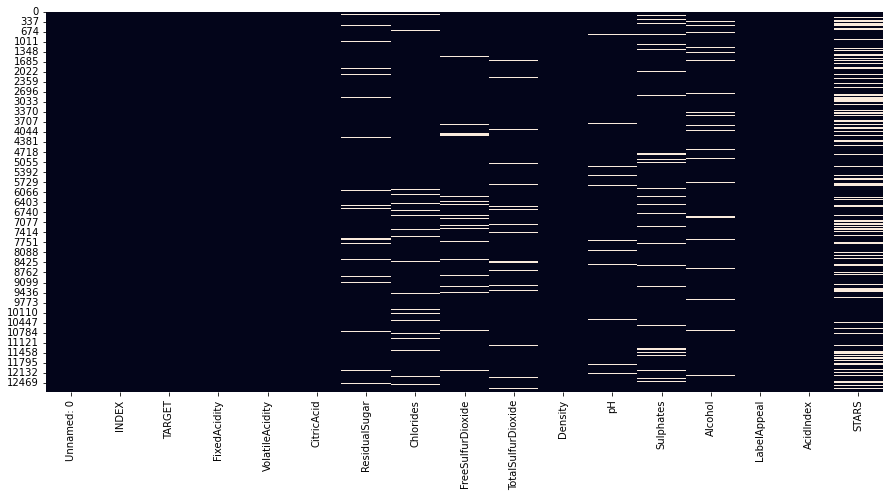

In [7]:
#see the distribution of the null values
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(),cbar=False)

In [8]:
#check if any duplicated rows
df.duplicated().sum()

0

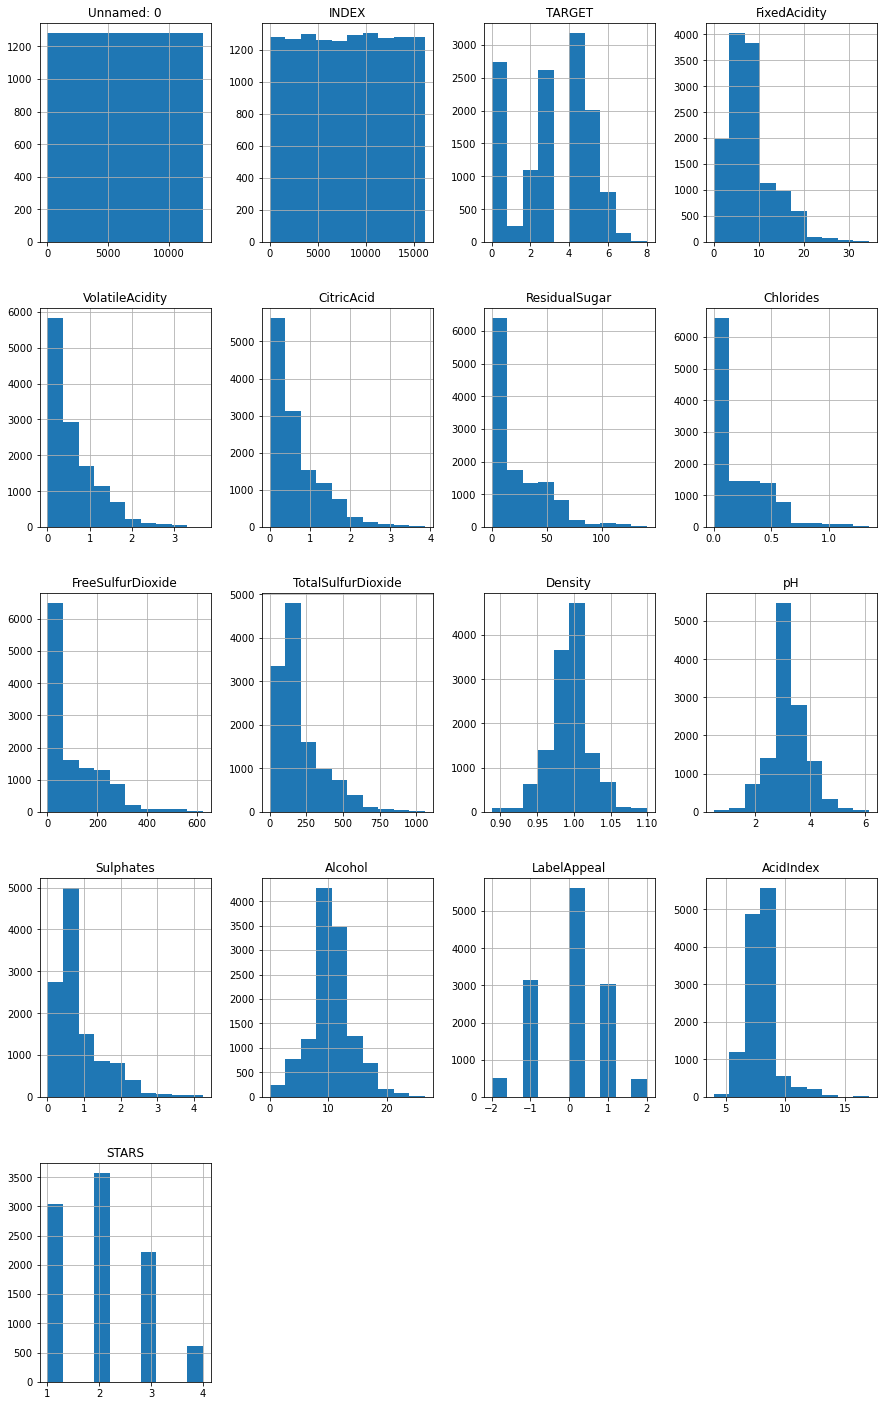

In [9]:
#plot the histograms for all the attributes and see the distribution of the data
df.hist(bins = 10,figsize=(15,25));

In [10]:
dfr = df.drop(['Unnamed: 0','INDEX'],axis = 1)

Below boxplots suggests that most of the variables of the dataset has its values spread on the right side. Through this we can state that most of the variables are positively skewed

The data is evenly spread on both the ends for Density and pH variables. The chemical composition content ranges between those values, do not confuse it with the outliers. One can check the perfect content range and mark the others as outliers

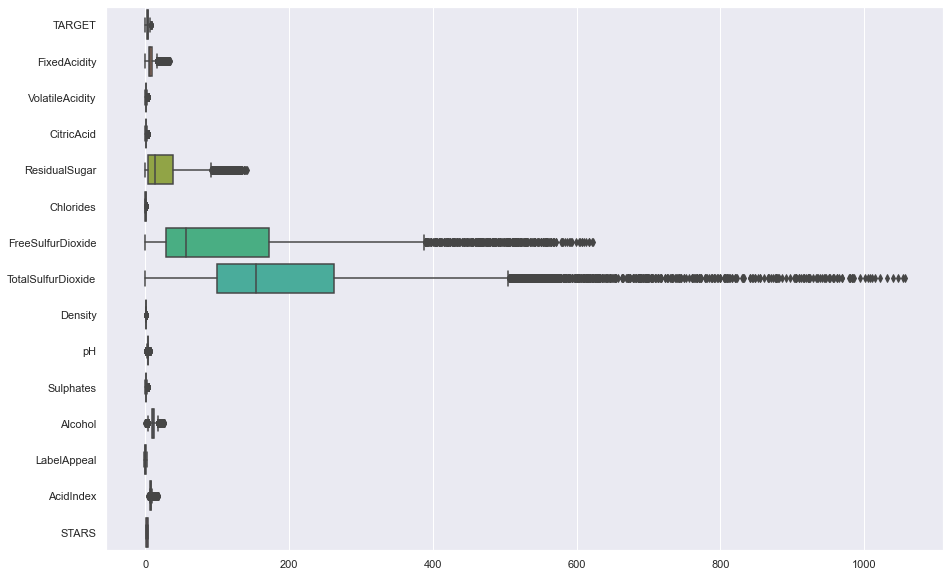

In [11]:
#boxplot
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data = dfr, orient = "h");

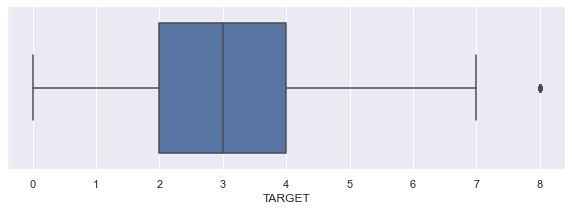

In [12]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['TARGET']);

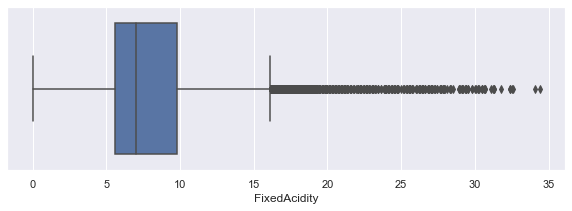

In [13]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['FixedAcidity']);

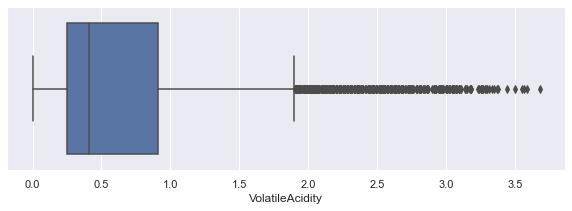

In [14]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['VolatileAcidity']);

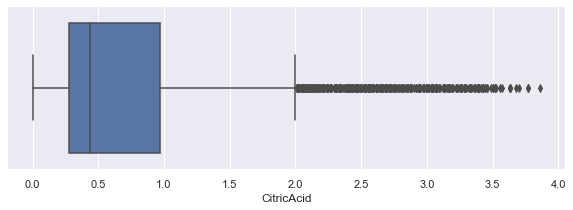

In [15]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['CitricAcid']);

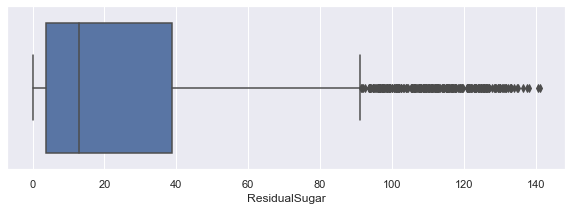

In [16]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['ResidualSugar']);

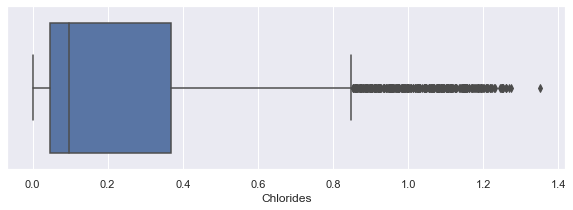

In [17]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['Chlorides']);

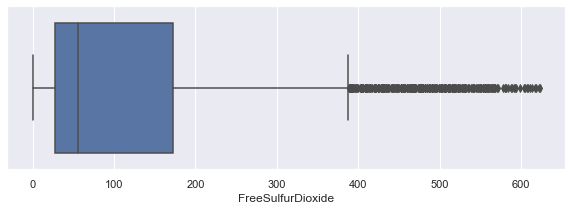

In [18]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['FreeSulfurDioxide']);

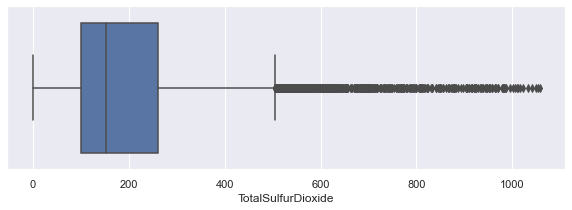

In [19]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['TotalSulfurDioxide']);

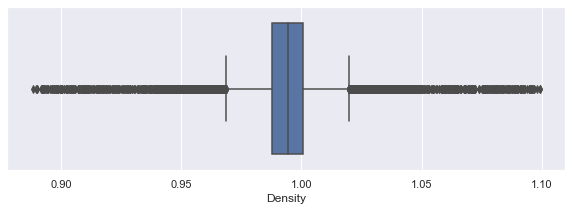

In [20]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['Density']);

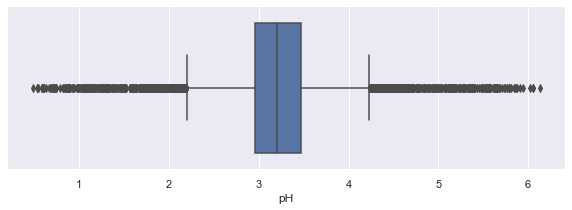

In [21]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['pH']);

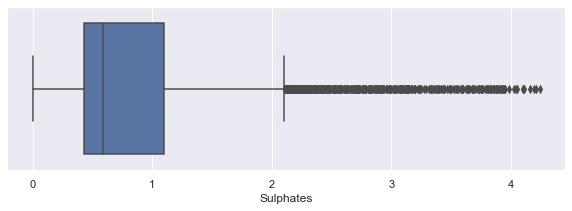

In [22]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['Sulphates']);

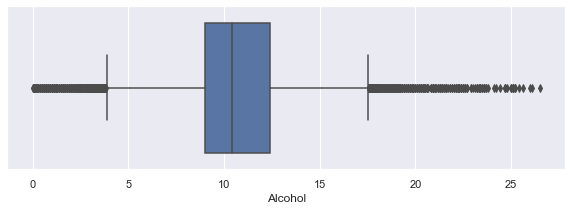

In [23]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['Alcohol']);

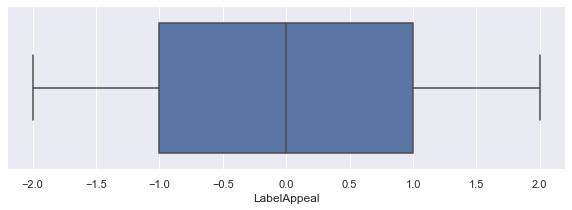

In [24]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['LabelAppeal']);

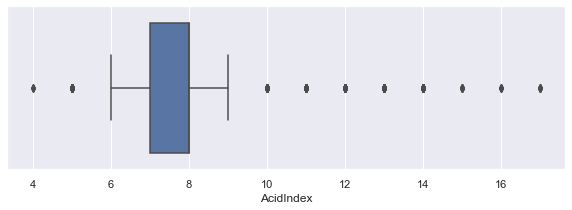

In [25]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['AcidIndex']);

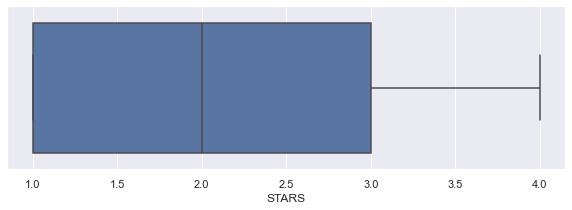

In [26]:
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(df['STARS']);

Let's plot probability density function of all the attributes using distplot

The plots definitely show positive skewness or right skewness for attributes- fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates

The attributes pH, density show almost zero skewness as the values are evenly distributed towards both the ends

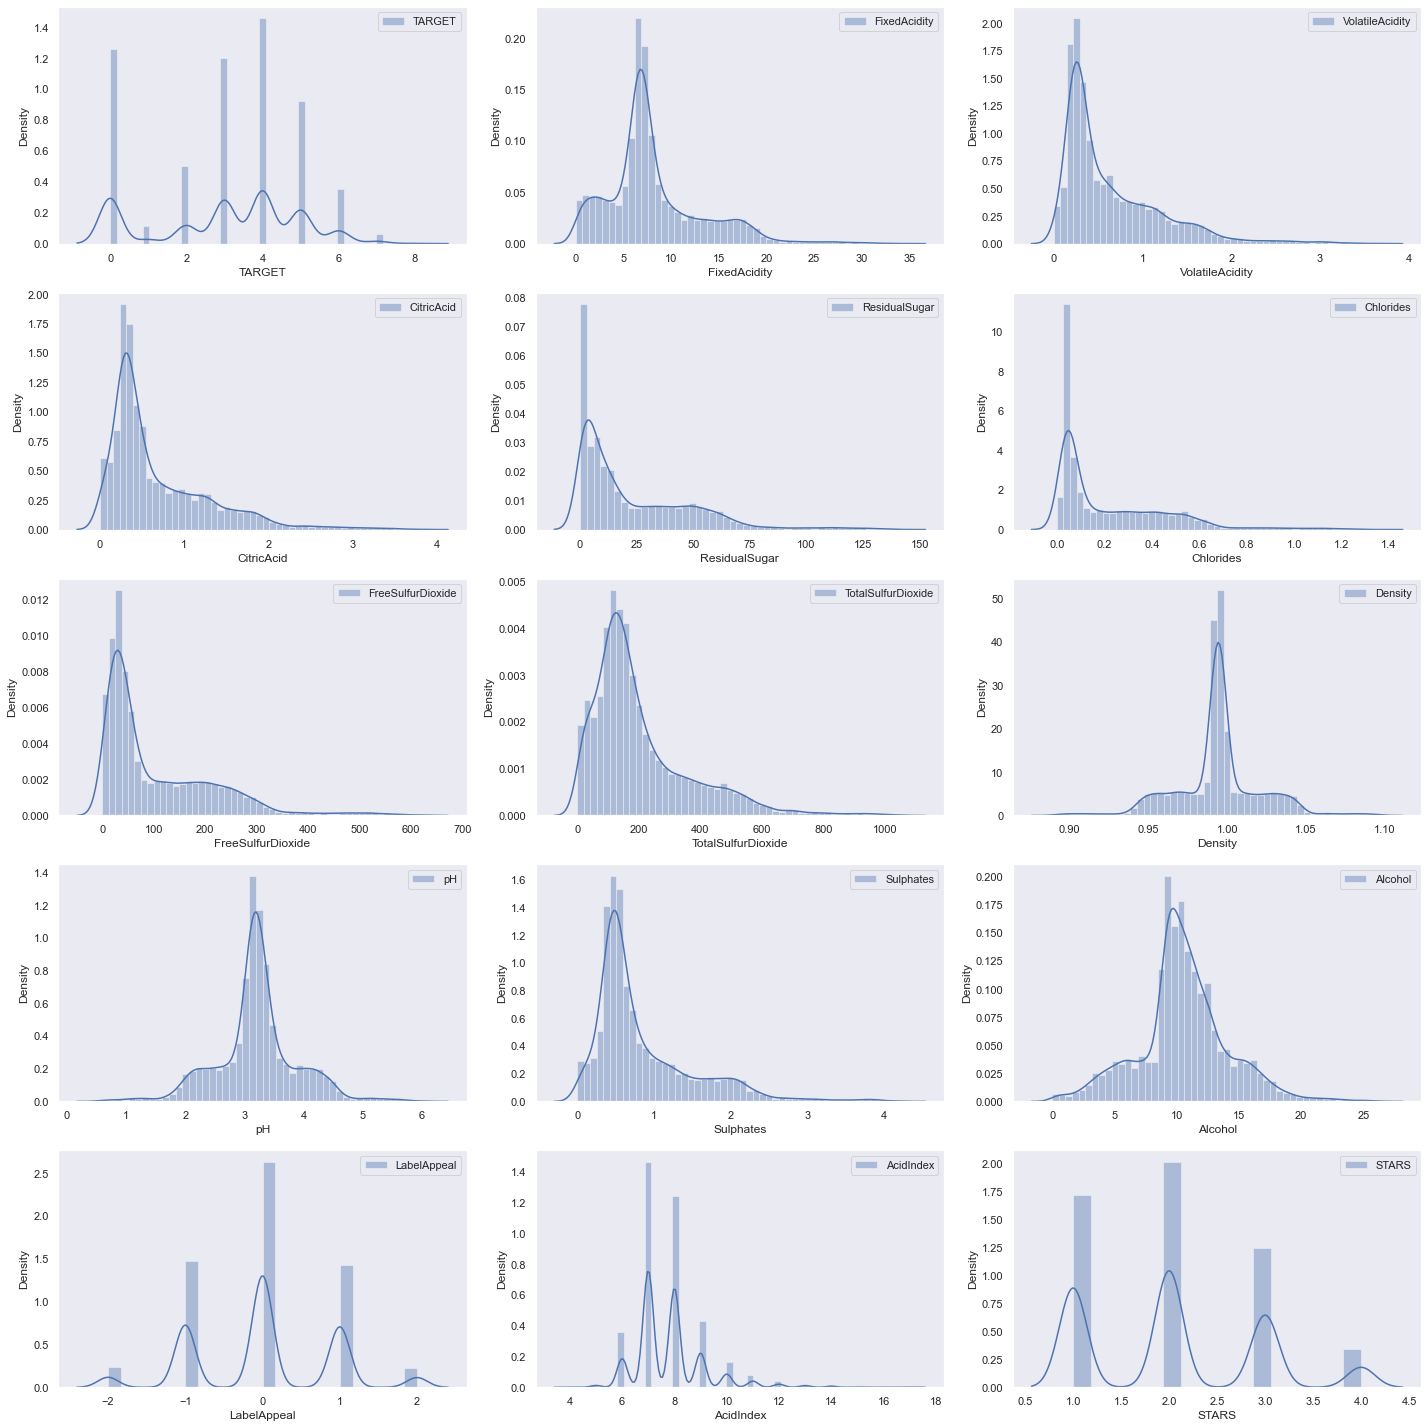

In [27]:
#This functions plots the estimated probability density function of the data

plt.figure(figsize=(20,20))
for i,col in enumerate(list(dfr.columns.values)):
    plt.subplot(5,3,i+1)
    sns.distplot(dfr[col],label=col,kde=True)
    plt.grid()
    plt.legend(loc= 'upper right')
    plt.tight_layout()

In [28]:
#check the skew values of all the variables to validate your understanding
dfr.skew(axis=0,skipna=True)

TARGET               -0.326378
FixedAcidity          1.174556
VolatileAcidity       1.653366
CitricAcid            1.643195
ResidualSugar         1.469162
Chlorides             1.481147
FreeSulfurDioxide     1.530134
TotalSulfurDioxide    1.611275
Density              -0.018698
pH                    0.044299
Sulphates             1.691810
Alcohol               0.182591
LabelAppeal           0.008431
AcidIndex             1.648883
STARS                 0.447378
dtype: float64

Do the bivariate analysis using the boxplots between the Target and all other attributes

<AxesSubplot:xlabel='TARGET', ylabel='Alcohol'>

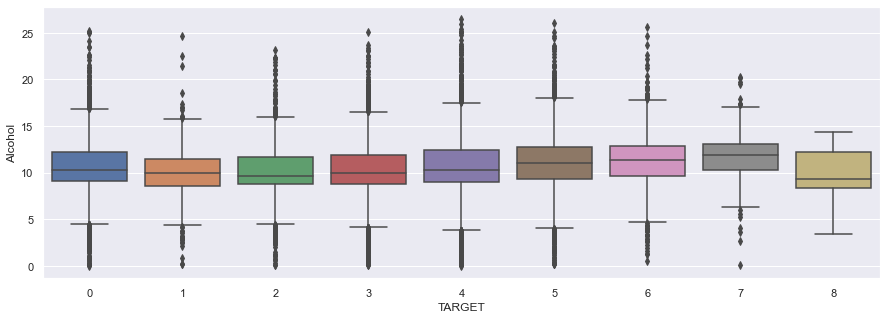

In [29]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x = df['TARGET'],y = df['Alcohol'],data = df)

<AxesSubplot:xlabel='TARGET', ylabel='FixedAcidity'>

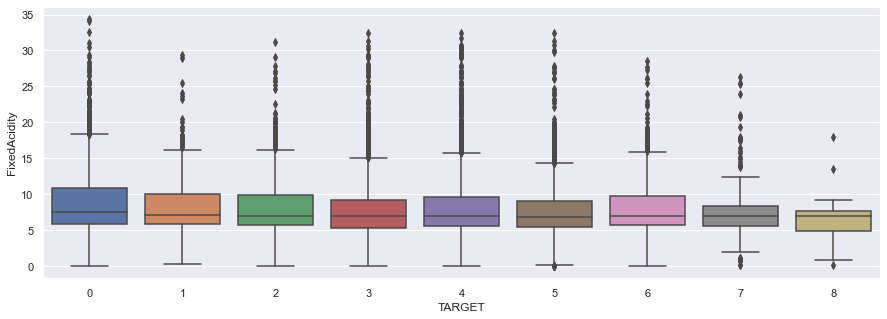

In [30]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x = df['TARGET'],y = df['FixedAcidity'],data = df)

<AxesSubplot:xlabel='TARGET', ylabel='pH'>

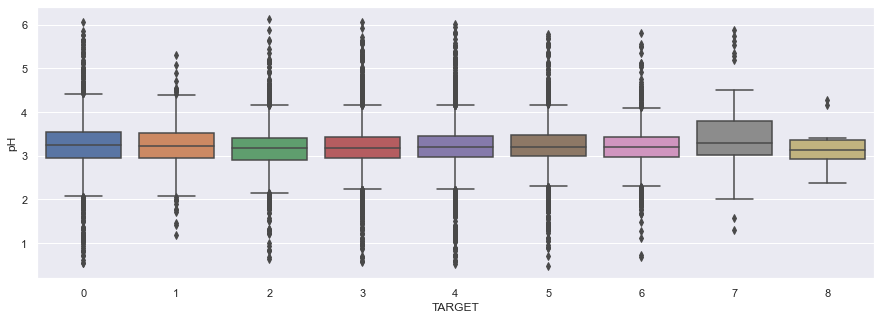

In [31]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x = df['TARGET'],y = df['pH'],data = df)

<AxesSubplot:xlabel='TARGET', ylabel='Density'>

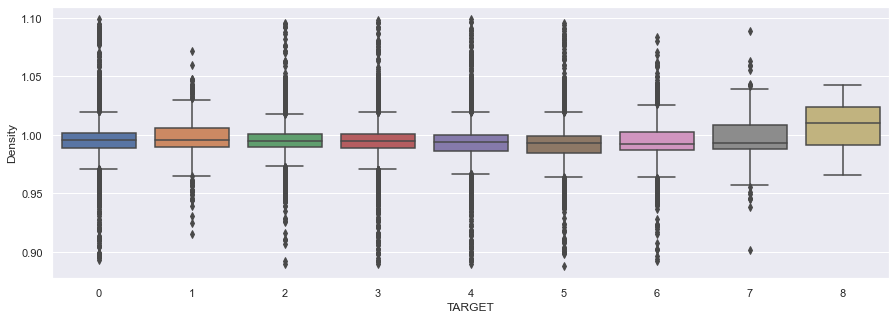

In [32]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x = df['TARGET'],y = df['Density'],data = df)

<AxesSubplot:xlabel='TARGET', ylabel='ResidualSugar'>

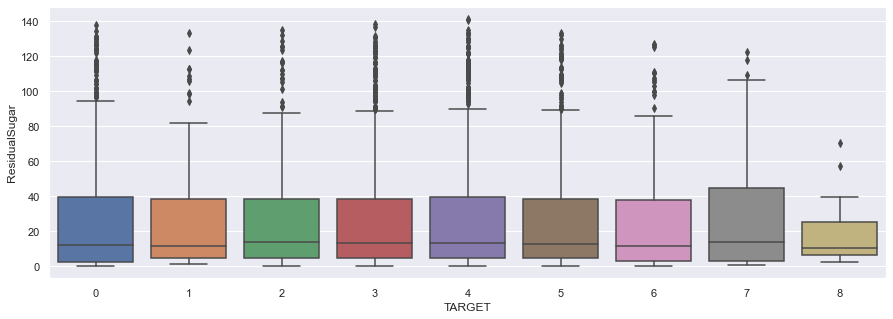

In [33]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x = df['TARGET'],y = df['ResidualSugar'],data = df)

<AxesSubplot:xlabel='TARGET', ylabel='TotalSulfurDioxide'>

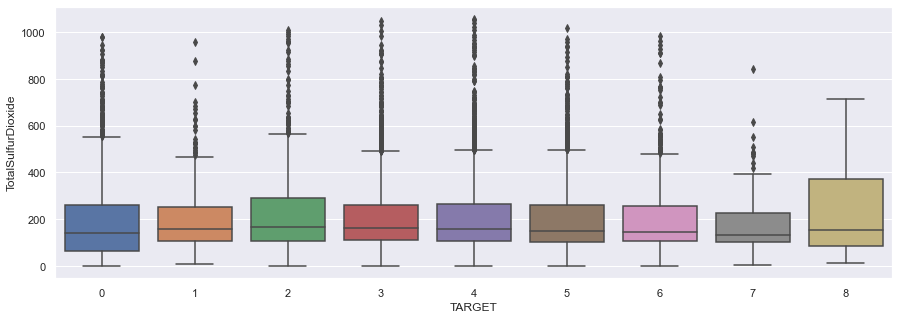

In [34]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x = df['TARGET'],y = df['TotalSulfurDioxide'],data = df)

<AxesSubplot:xlabel='TARGET', ylabel='AcidIndex'>

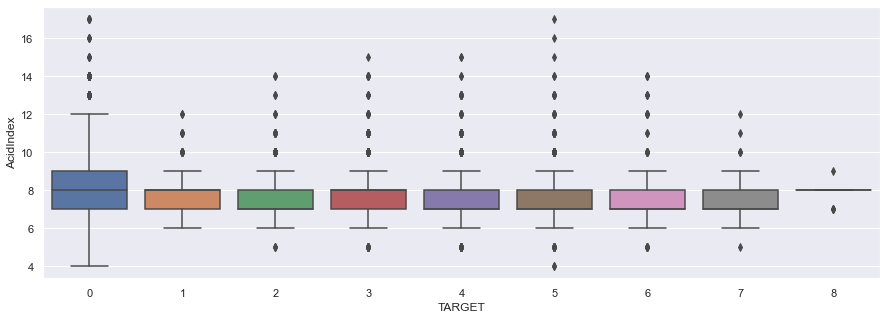

In [35]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x = df['TARGET'],y = df['AcidIndex'],data = df)

<AxesSubplot:xlabel='TARGET', ylabel='STARS'>

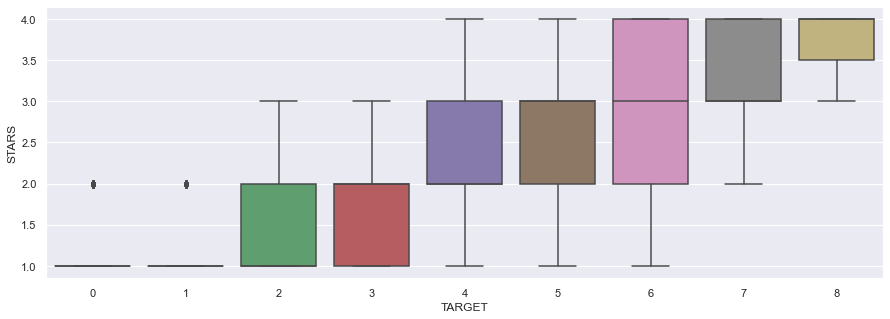

In [36]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x = df['TARGET'],y = df['STARS'],data = df)

In [37]:
#check the correlation
df.corr()

Unnamed: 0     INDEX    TARGET  FixedAcidity  \
Unnamed: 0            1.000000  0.999997  0.001257      0.004548   
INDEX                 0.999997  1.000000  0.001256      0.004581   
TARGET                0.001257  0.001256  1.000000     -0.052984   
FixedAcidity          0.004548  0.004581 -0.052984      1.000000   
VolatileAcidity      -0.000583 -0.000601 -0.070195      0.010195   
CitricAcid            0.004887  0.004908  0.013953     -0.004378   
ResidualSugar         0.004399  0.004408  0.003645      0.005040   
Chlorides            -0.006278 -0.006292 -0.028463      0.002232   
FreeSulfurDioxide     0.003134  0.003138  0.024503     -0.003158   
TotalSulfurDioxide    0.009083  0.009035  0.035253     -0.012379   
Density              -0.010766 -0.010779 -0.035518     -0.000057   
pH                   -0.005869 -0.005853 -0.009445     -0.002324   
Sulphates            -0.009095 -0.009073 -0.035259      0.020987   
Alcohol              -0.008205 -0.008201  0.063394     -0.009406   
LabelAppeal           0.011582  0.011553  0.356500     -0.002240   
AcidIndex            -0.007124 -0.007097 -0.246049      0.179916   
STARS                 0.000219  0.000194  0.558794     -0.018505   

                    VolatileAcidity  CitricAcid  ResidualSugar  Chlorides  \
Unnamed: 0                -0.000583    0.004887       0.004399  -0.006278   
INDEX                     -0.000601    0.004908       0.004408  -0.006292   
TARGET                    -0.070195    0.013953       0.003645  -0.028463   
FixedAcidity               0.010195   -0.004378       0.005040   0.002232   
VolatileAcidity            1.000000   -0.002511       0.003443   0.008041   
CitricAcid                -0.002511    1.000000      -0.013510  -0.004550   
ResidualSugar              0.003443   -0.013510       1.000000  -0.002837   
Chlorides                  0.008041   -0.004550      -0.002837   1.000000   
FreeSulfurDioxide         -0.010797    0.003845      -0.007418  -0.004884   
TotalSulfurDioxide        -0.035379    0.009138       0.014476  -0.015316   
Density                   -0.004208   -0.010854      -0.002794   0.016483   
pH                         0.016246    0.003293       0.001203   0.008080   
Sulphates                  0.007220    0.017488      -0.007658   0.021366   
Alcohol                    0.014157   -0.006218      -0.006927  -0.001174   
LabelAppeal               -0.015353    0.017322      -0.000567  -0.008534   
AcidIndex                  0.035434    0.036506      -0.011646   0.029846   
STARS                     -0.030154    0.001627       0.009897   0.002516   

                    FreeSulfurDioxide  TotalSulfurDioxide   Density        pH  \
Unnamed: 0                   0.003134            0.009083 -0.010766 -0.005869   
INDEX                        0.003138            0.009035 -0.010779 -0.005853   
TARGET                       0.024503            0.035253 -0.035518 -0.009445   
FixedAcidity                -0.003158           -0.012379 -0.000057 -0.002324   
VolatileAcidity             -0.010797           -0.035379 -0.004208  0.016246   
CitricAcid                   0.003845            0.009138 -0.010854  0.003293   
ResidualSugar               -0.007418            0.014476 -0.002794  0.001203   
Chlorides                   -0.004884           -0.015316  0.016483  0.008080   
FreeSulfurDioxide            1.000000            0.014710  0.005979 -0.006287   
TotalSulfurDioxide           0.014710            1.000000  0.014692  0.010575   
Density                      0.005979            0.014692  1.000000  0.005768   
pH                          -0.006287            0.010575  0.005768  1.000000   
Sulphates                   -0.002096           -0.010995  0.012044  0.013386   
Alcohol                     -0.011384           -0.033102 -0.007828 -0.009365   
LabelAppeal                  0.011858           -0.015027 -0.009370  0.004138   
AcidIndex                   -0.021074           -0.037786  0.040413 -0.058676   
STARS                        0.

<AxesSubplot:>

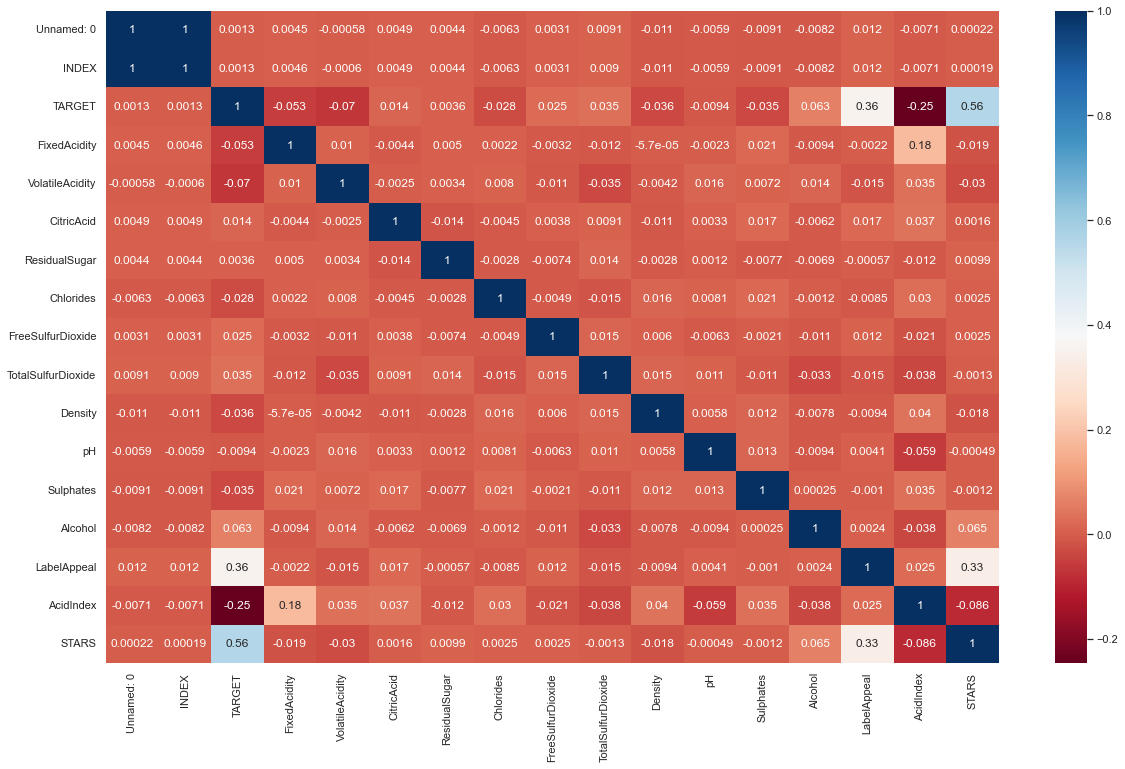

In [38]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap='RdBu',annot=True)

Notice that the above correlation heatmap shows the value range from -0.2 to +1, make sure to always have the range from -1 to +1. It changes the complete picture visually

<AxesSubplot:>

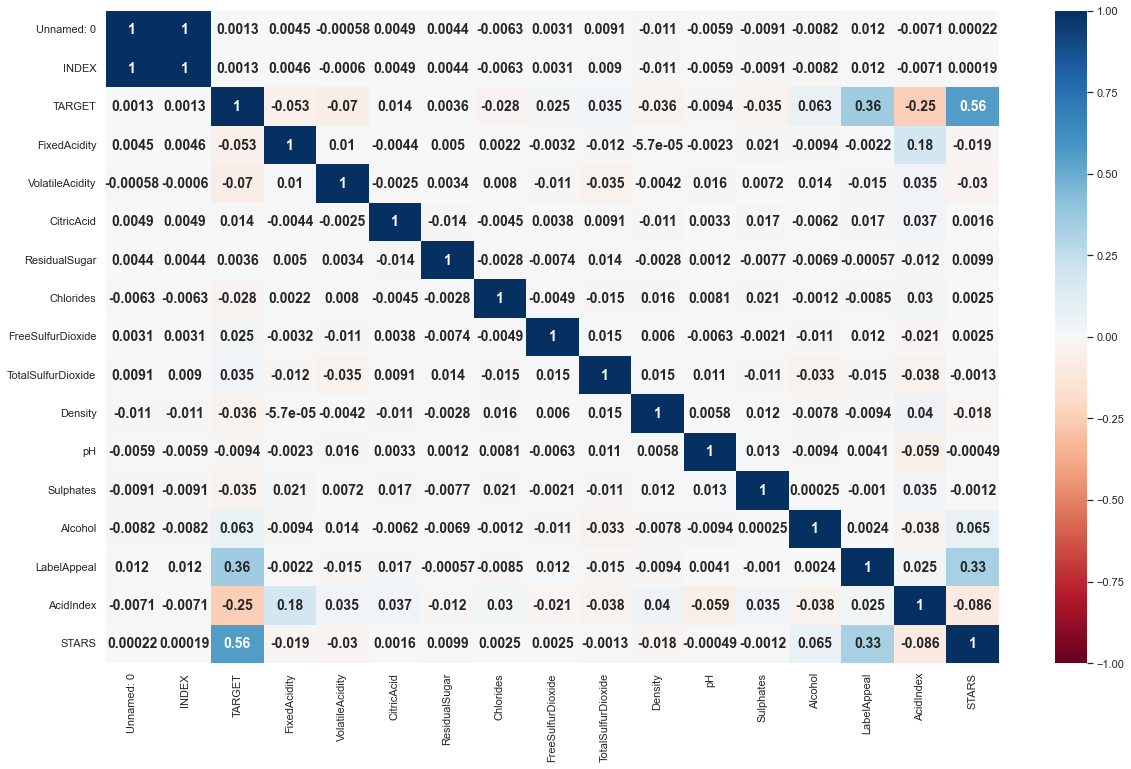

In [39]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap='RdBu',vmin = -1, vmax = 1,annot=True,annot_kws={'fontsize':14,'fontweight':'bold'})

- Correlation does not show any strong positive or negative relationship between any variables
- Target is the reponse variable. To be more specific, correlation map does not show strong positive or negative relationship between Target and other variables
- Target has very mild positive relation (0.36) with Label appealing i.e. when Label appealing values increases the wine sales will increase
- Target also has medium positive relation with the STARS, hence, wine sales will increase as the wine rating increases. Notice that this is the only relation with value above 0.50
- Label appealing and STARS has very mild positive relation with each other as well
- Target has very weak negative relation (-0.25) with the Acid index. If the Acid index increase, wine sales would decrease

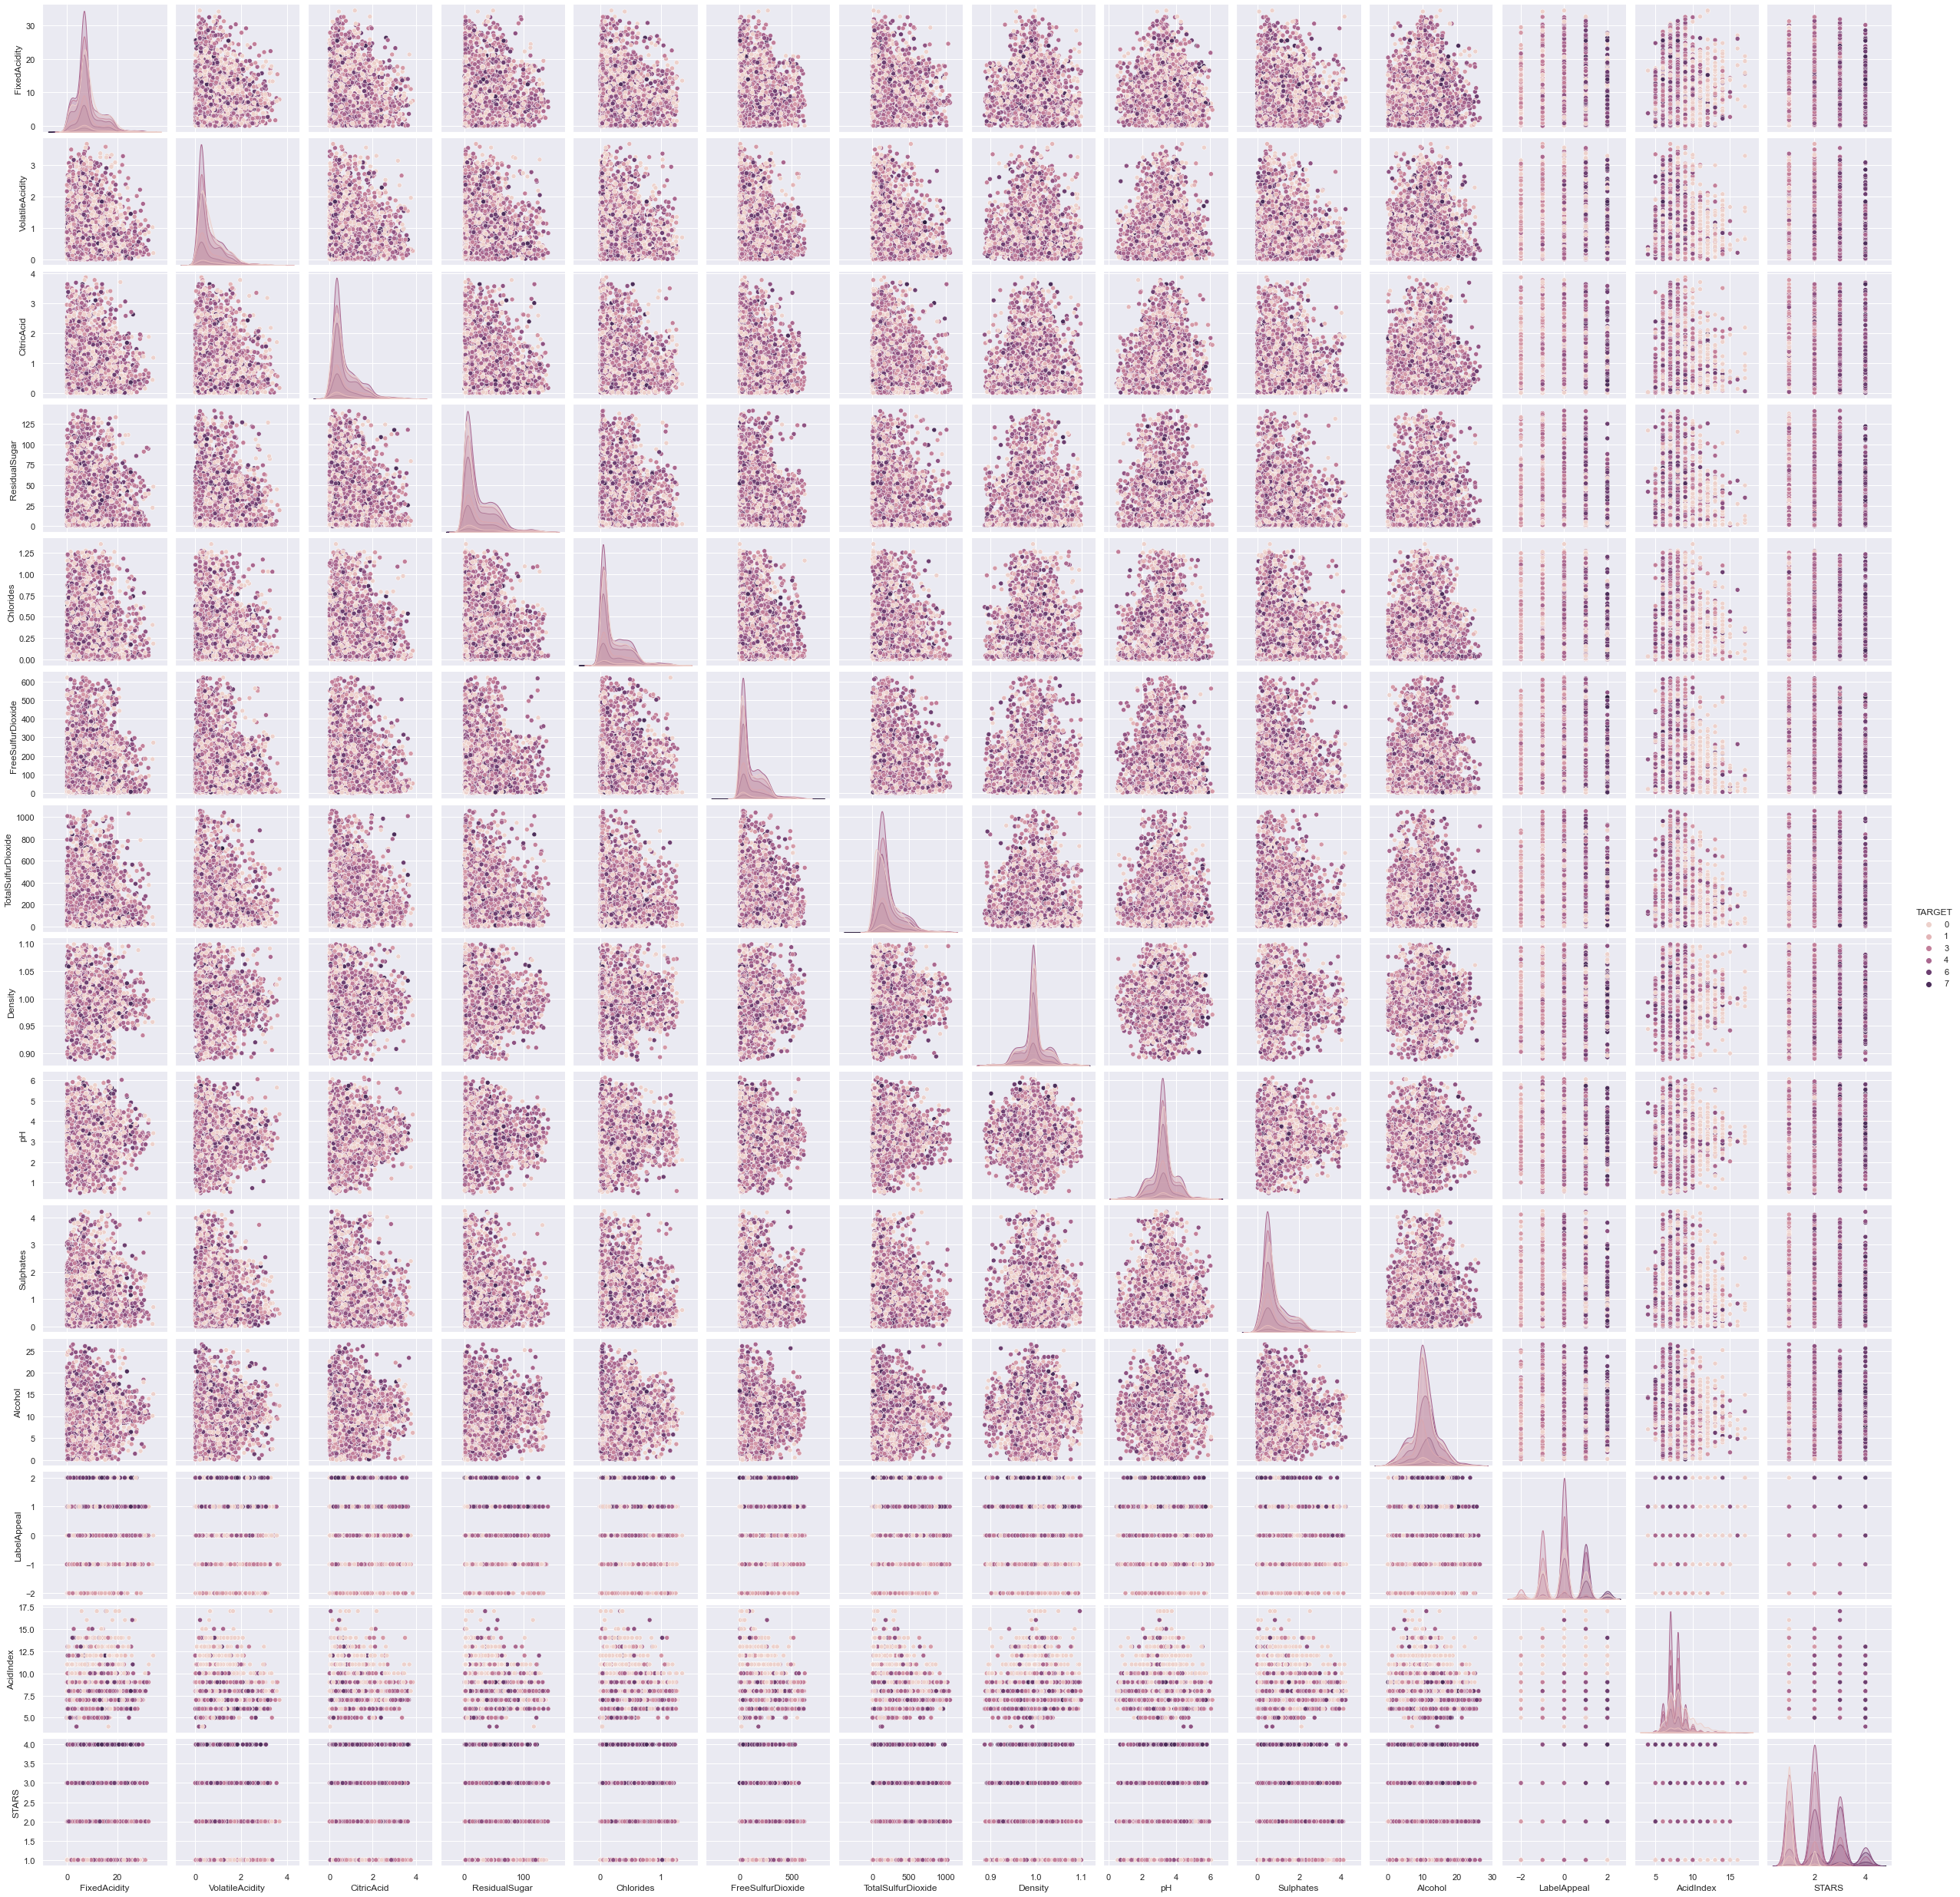

In [40]:
#pairplot the data using Target as hue
sns.set(rc={'figure.figsize':(15,15)})
sns.pairplot(dfr,hue = 'TARGET')

### CLEANING AND PREPARING THE DATA:

Re-run few functions again to clean and prepare the data

In [41]:
#check the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          12795 non-null  int64  
 1   INDEX               12795 non-null  int64  
 2   TARGET              12795 non-null  int64  
 3   FixedAcidity        12795 non-null  float64
 4   VolatileAcidity     12795 non-null  float64
 5   CitricAcid          12795 non-null  float64
 6   ResidualSugar       12179 non-null  float64
 7   Chlorides           12157 non-null  float64
 8   FreeSulfurDioxide   12148 non-null  float64
 9   TotalSulfurDioxide  12113 non-null  float64
 10  Density             12795 non-null  float64
 11  pH                  12400 non-null  float64
 12  Sulphates           11585 non-null  float64
 13  Alcohol             12142 non-null  float64
 14  LabelAppeal         12795 non-null  int64  
 15  AcidIndex           12795 non-null  int64  
 16  STAR

In [42]:
dfr = df.drop(['Unnamed: 0','INDEX'],axis = 1)

In [43]:
dfr.describe().T

count        mean         std      min        25%  \
TARGET              12795.0    3.029074    1.926368  0.00000    2.00000   
FixedAcidity        12795.0    8.063251    4.996119  0.00000    5.60000   
VolatileAcidity     12795.0    0.641086    0.555614  0.00000    0.25000   
CitricAcid          12795.0    0.686315    0.606005  0.00000    0.28000   
ResidualSugar       12179.0   23.367809   24.945667  0.00000    3.60000   
Chlorides           12157.0    0.222559    0.234288  0.00000    0.04600   
FreeSulfurDioxide   12148.0  106.679042  108.102694  0.00000   28.00000   
TotalSulfurDioxide  12113.0  204.319120  163.116881  0.00000  100.00000   
Density             12795.0    0.994203    0.026538  0.88809    0.98772   
pH                  12400.0    3.207628    0.679687  0.48000    2.96000   
Sulphates           11585.0    0.846668    0.655612  0.00000    0.43000   
Alcohol             12142.0   10.523778    3.629154  0.00000    9.00000   
LabelAppeal         12795.0   -0.009066    0.891089 -2.00000   -1.00000   
AcidIndex           12795.0    7.772724    1.323926  4.00000    7.00000   
STARS                9436.0    2.041755    0.902540  1.00000    1.00000   

                          50%         75%         max  
TARGET                3.00000    4.000000     8.00000  
FixedAcidity          7.00000    9.800000    34.40000  
VolatileAcidity       0.41000    0.910000     3.68000  
CitricAcid            0.44000    0.970000     3.86000  
ResidualSugar        12.90000   38.700000   141.15000  
Chlorides             0.09800    0.368000     1.35100  
FreeSulfurDioxide    56.00000  172.000000   623.00000  
TotalSulfurDioxide  154.00000  262.000000  1057.00000  
Density               0.99449    1.000515     1.09924  
pH                    3.20000    3.470000     6.13000  
Sulphates             0.59000    1.100000     4.24000  
Alcohol              10.40000   12.400000    26.50000  
LabelAppeal           0.00000    1.000000     2.00000  
AcidIndex             8.00000    8.000000    17.00000  
STARS                 2.00000    3.000000     4.00000

In [44]:
#check the percentage of the missing data from total data
d = dfr.isnull().sum()
round(d*100/len(df),2)

TARGET                 0.00
FixedAcidity           0.00
VolatileAcidity        0.00
CitricAcid             0.00
ResidualSugar          4.81
Chlorides              4.99
FreeSulfurDioxide      5.06
TotalSulfurDioxide     5.33
Density                0.00
pH                     3.09
Sulphates              9.46
Alcohol                5.10
LabelAppeal            0.00
AcidIndex              0.00
STARS                 26.25
dtype: float64

In [45]:
dfr.skew(axis=0,skipna=True)

TARGET               -0.326378
FixedAcidity          1.174556
VolatileAcidity       1.653366
CitricAcid            1.643195
ResidualSugar         1.469162
Chlorides             1.481147
FreeSulfurDioxide     1.530134
TotalSulfurDioxide    1.611275
Density              -0.018698
pH                    0.044299
Sulphates             1.691810
Alcohol               0.182591
LabelAppeal           0.008431
AcidIndex             1.648883
STARS                 0.447378
dtype: float64

#### Replacing the missing values using imputation techniques:

- __Imputation with the constant value__: It replaces the missing value with either zero or any constant value
- __Imputation with mean__: It replaces the missing value with the mean value in each column. Preferred if the data is numeric and not skewed
- __Imputation with median__: It replaces the missing value with the median value in each column. Preferred if the data is numeric and skewed
- __Imputation with mode__: It replaces the missing value with most frequent value in each column. Preferred if the data is either numeric or string/object
- __KNN imputation__: It replaces the missing value by finding the closest neighbors using the euclidean distance metric. Does not work on the categorical attributes

In [46]:
dfr1=dfr.copy()

In [47]:
#replace the missing data of all the variables (except STARS) with median value of the respective column
dfr1['ResidualSugar'].fillna(dfr1['ResidualSugar'].median(),inplace = True)

dfr1['Chlorides'].fillna(dfr1['Chlorides'].median(),inplace = True)

dfr1['FreeSulfurDioxide'].fillna(dfr1['FreeSulfurDioxide'].median(),inplace = True)

dfr1['TotalSulfurDioxide'].fillna(dfr1['TotalSulfurDioxide'].median(),inplace = True)

dfr1['pH'].fillna(dfr1['pH'].median(),inplace = True)

dfr1['Sulphates'].fillna(dfr1['Sulphates'].median(),inplace = True)

dfr1['Alcohol'].fillna(dfr1['Alcohol'].median(),inplace = True)

In [48]:
#verify if the missing values are filled
dfr1.isnull().sum()

TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar            0
Chlorides                0
FreeSulfurDioxide        0
TotalSulfurDioxide       0
Density                  0
pH                       0
Sulphates                0
Alcohol                  0
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

<AxesSubplot:>

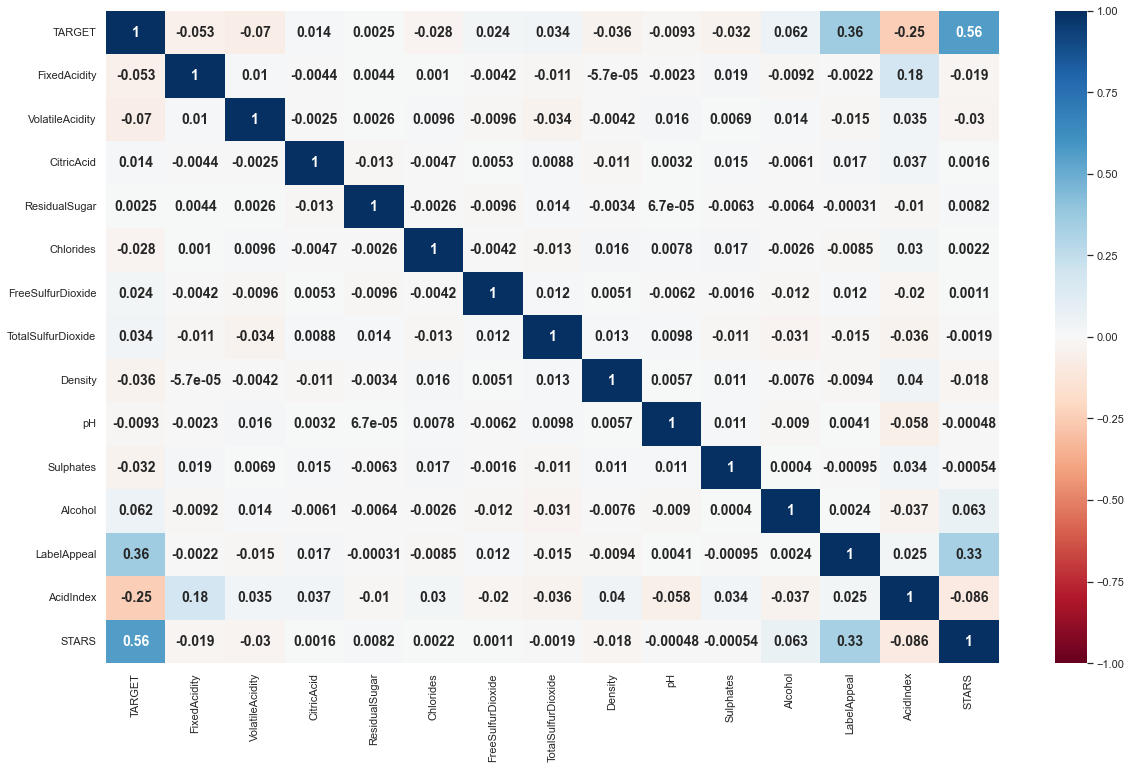

In [49]:
#plot correlation heatmap
plt.figure(figsize=(20,12))
sns.heatmap(dfr1.corr(),cmap='RdBu',vmin = -1, vmax = 1,annot=True,annot_kws={'fontsize':14,'fontweight':'bold'})

No significant difference seen in the correlation matrix after filling the missing values. The reasons might be:
- few values were missing i.e. 4%-5% which made no big difference to the data after imputing
- there is actually no correlation between those variables

Cross-check the findings using different imputation technique and see if it makes sense

In [50]:
#try imputing the values (except for STARS) using different model as we cannot see any 
#significant difference in the above model

dfr_knn=dfr.copy(deep = True)
from sklearn.impute import KNNImputer

knn_v_1 = KNNImputer(n_neighbors=8, weights="uniform")
dfr_knn['ResidualSugar']=knn_v_1.fit_transform(dfr_knn[['ResidualSugar']])

knn_v_2 = KNNImputer(n_neighbors=8, weights="uniform")
dfr_knn['Chlorides']=knn_v_2.fit_transform(dfr_knn[['Chlorides']])

knn_v_3 = KNNImputer(n_neighbors=8, weights="uniform")
dfr_knn['FreeSulfurDioxide']=knn_v_3.fit_transform(dfr_knn[['FreeSulfurDioxide']])

knn_v_4 = KNNImputer(n_neighbors=8, weights="uniform")
dfr_knn['TotalSulfurDioxide']=knn_v_4.fit_transform(dfr_knn[['TotalSulfurDioxide']])

knn_v_5 = KNNImputer(n_neighbors=8, weights="uniform")
dfr_knn['pH']=knn_v_5.fit_transform(dfr_knn[['pH']])

knn_v_6 = KNNImputer(n_neighbors=8, weights="uniform")
dfr_knn['Sulphates']=knn_v_6.fit_transform(dfr_knn[['Sulphates']])

knn_v_7 = KNNImputer(n_neighbors=8, weights="uniform")
dfr_knn['Alcohol']=knn_v_7.fit_transform(dfr_knn[['Alcohol']])


In [51]:
#cross-check if any null values
dfr1.isnull().sum()

TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar            0
Chlorides                0
FreeSulfurDioxide        0
TotalSulfurDioxide       0
Density                  0
pH                       0
Sulphates                0
Alcohol                  0
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

<AxesSubplot:>

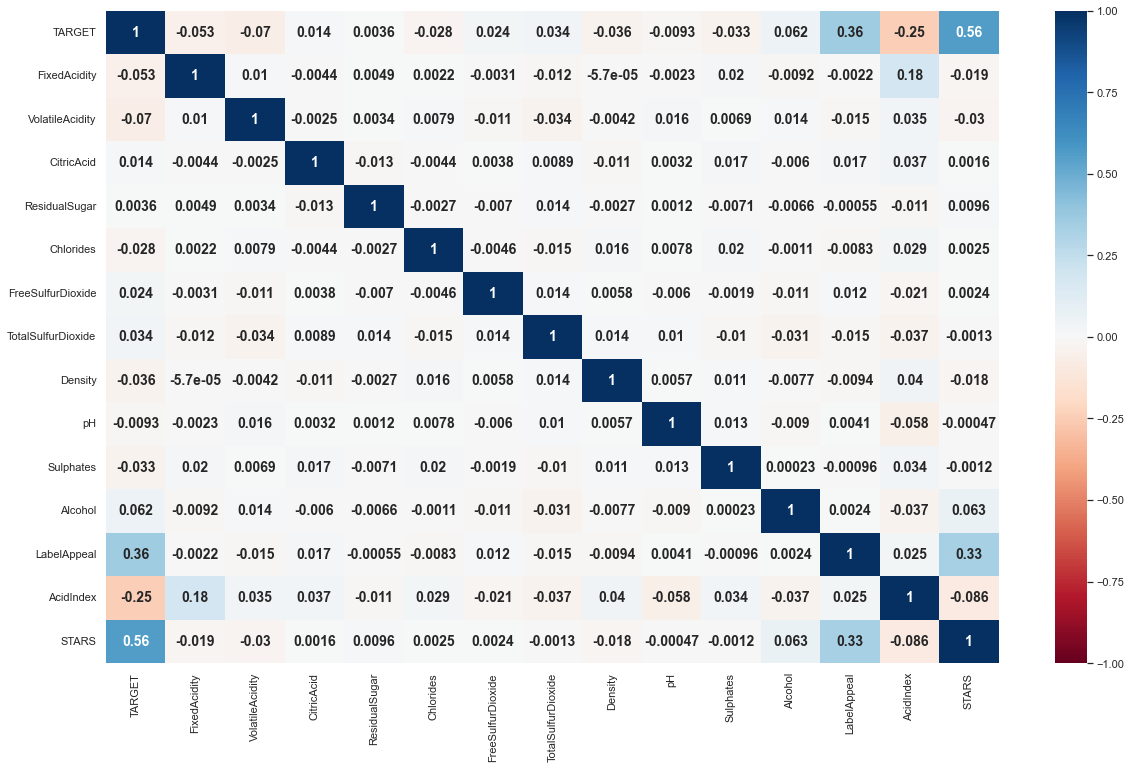

In [52]:
#plot the correlation heatmap
plt.figure(figsize=(20,12))
sns.heatmap(dfr_knn.corr(),cmap='RdBu',vmin = -1, vmax = 1,annot=True,annot_kws={'fontsize':14,'fontweight':'bold'})

Notice, there is no difference and no correlation seen between any other variables so we're good to go with the remaining variables

Let's proceed finding the missing values for STARS variable using regression model

In [53]:
dfr2 = dfr1.copy()
dfr2

TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0           3           3.2            1.160        0.98           54.2   
1           3           4.5            0.160        0.81           26.1   
2           5           7.1            2.640        0.88           14.8   
3           3           5.7            0.385        0.04           18.8   
4           4           8.0            0.330        1.26            9.4   
...       ...           ...              ...         ...            ...   
12790       0           5.0            0.790        2.01            5.0   
12791       5           8.9            0.470        0.29           84.9   
12792       4           6.0            0.170        1.10           37.0   
12793       3           7.7            0.320        0.12           12.9   
12794       4           5.2            0.040        0.81           52.7   

       Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  \
0          0.567               56.0               268.0  0.99280  3.33   
1          0.425               15.0               327.0  1.02792  3.38   
2          0.037              214.0               142.0  0.99518  3.12   
3          0.425               22.0               115.0  0.99640  2.24   
4          0.098              167.0               108.0  0.99457  3.12   
...          ...                ...                 ...      ...   ...   
12790      0.043               17.0               101.0  1.01077  3.39   
12791      0.259               54.0               154.0  0.99518  4.46   
12792      0.078               25.0               108.0  0.99076  3.25   
12793      0.029               26.0               274.0  0.99060  3.97   
12794      0.098              106.0               242.0  0.99454  3.94   

       Sulphates  Alcohol  LabelAppeal  AcidIndex  STARS  
0           0.59      9.9            0          8    2.0  
1           0.70     10.4           -1          7    3.0  
2           0.48     22.0           -1          8    3.0  
3           1.83      6.2           -1          6    1.0  
4           1.77     13.7            0          9    2.0  
...          ...      ...          ...        ...    ...  
12790       0.57      4.9            1          5    NaN  
12791       1.20     10.4           -1          8    2.0  
12792       0.59     12.3            0          6    2.0  
12793       0.62     11.0           -1          6    2.0  
12794       0.12      9.9            0          7    2.0  

[12795 rows x 15 columns]

In [54]:
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

In [55]:
#split the database using null values
X_test = dfr2.drop('STARS', axis=1)
y_test = dfr2['STARS']

In [56]:
dfr2_train = dfr2.dropna()
X_train = dfr2_train.drop('STARS',axis = 1)
y_train = dfr2_train['STARS']

In [57]:
#train the model
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [58]:
#predict the missing values
y_fill = model.predict(X_test)
y_fill

array([2., 3., 3., ..., 2., 2., 2.])

In [59]:
#replace the missing values column with the y_fill imputed values
dfr1['STARS'] = y_fill

In [60]:
dfr1.isna().sum()

TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64

<AxesSubplot:>

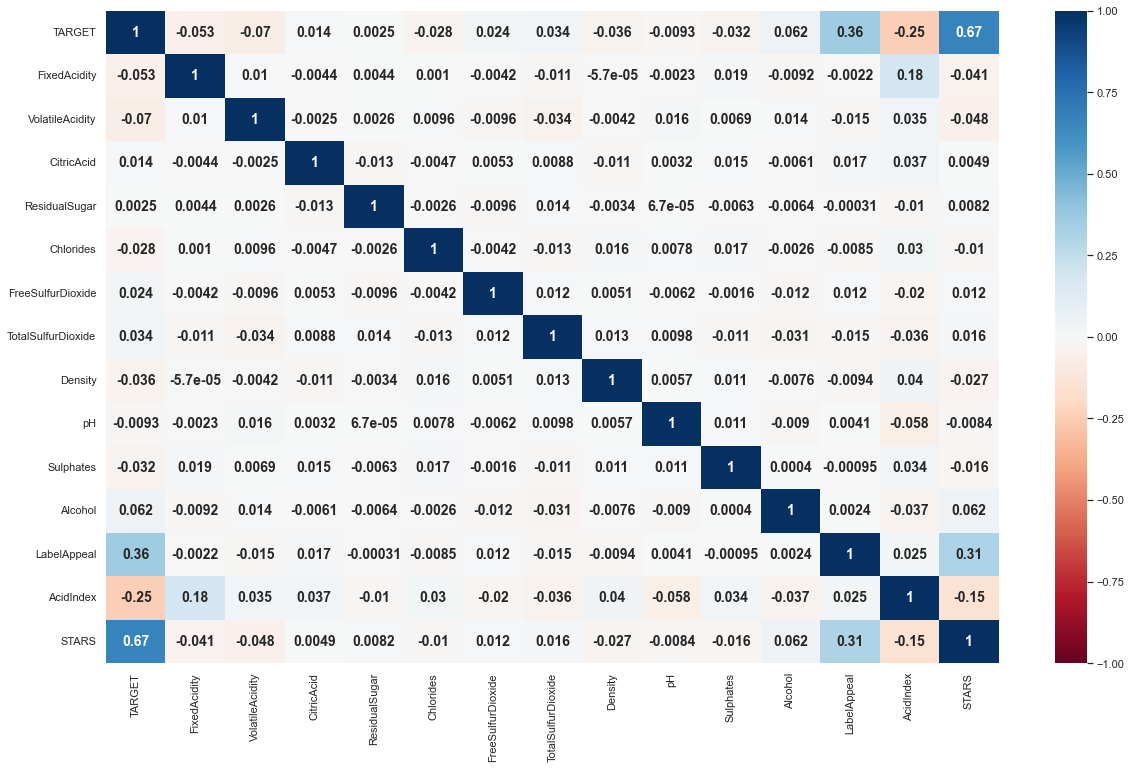

In [61]:
#plot the correlation heatmap
plt.figure(figsize=(20,12))
sns.heatmap(dfr1.corr(),cmap='RdBu',vmin = -1, vmax = 1,annot=True,annot_kws={'fontsize':14,'fontweight':'bold'})

This correlation matrix shows increased correlation value from 0.56 to 0.67. This shows a positive relation between the stars and the target, hence, increase in ratings will increase the sales of wine

### EXPLORATORY DATA ANALYSIS ON THE PREPARED DATA:

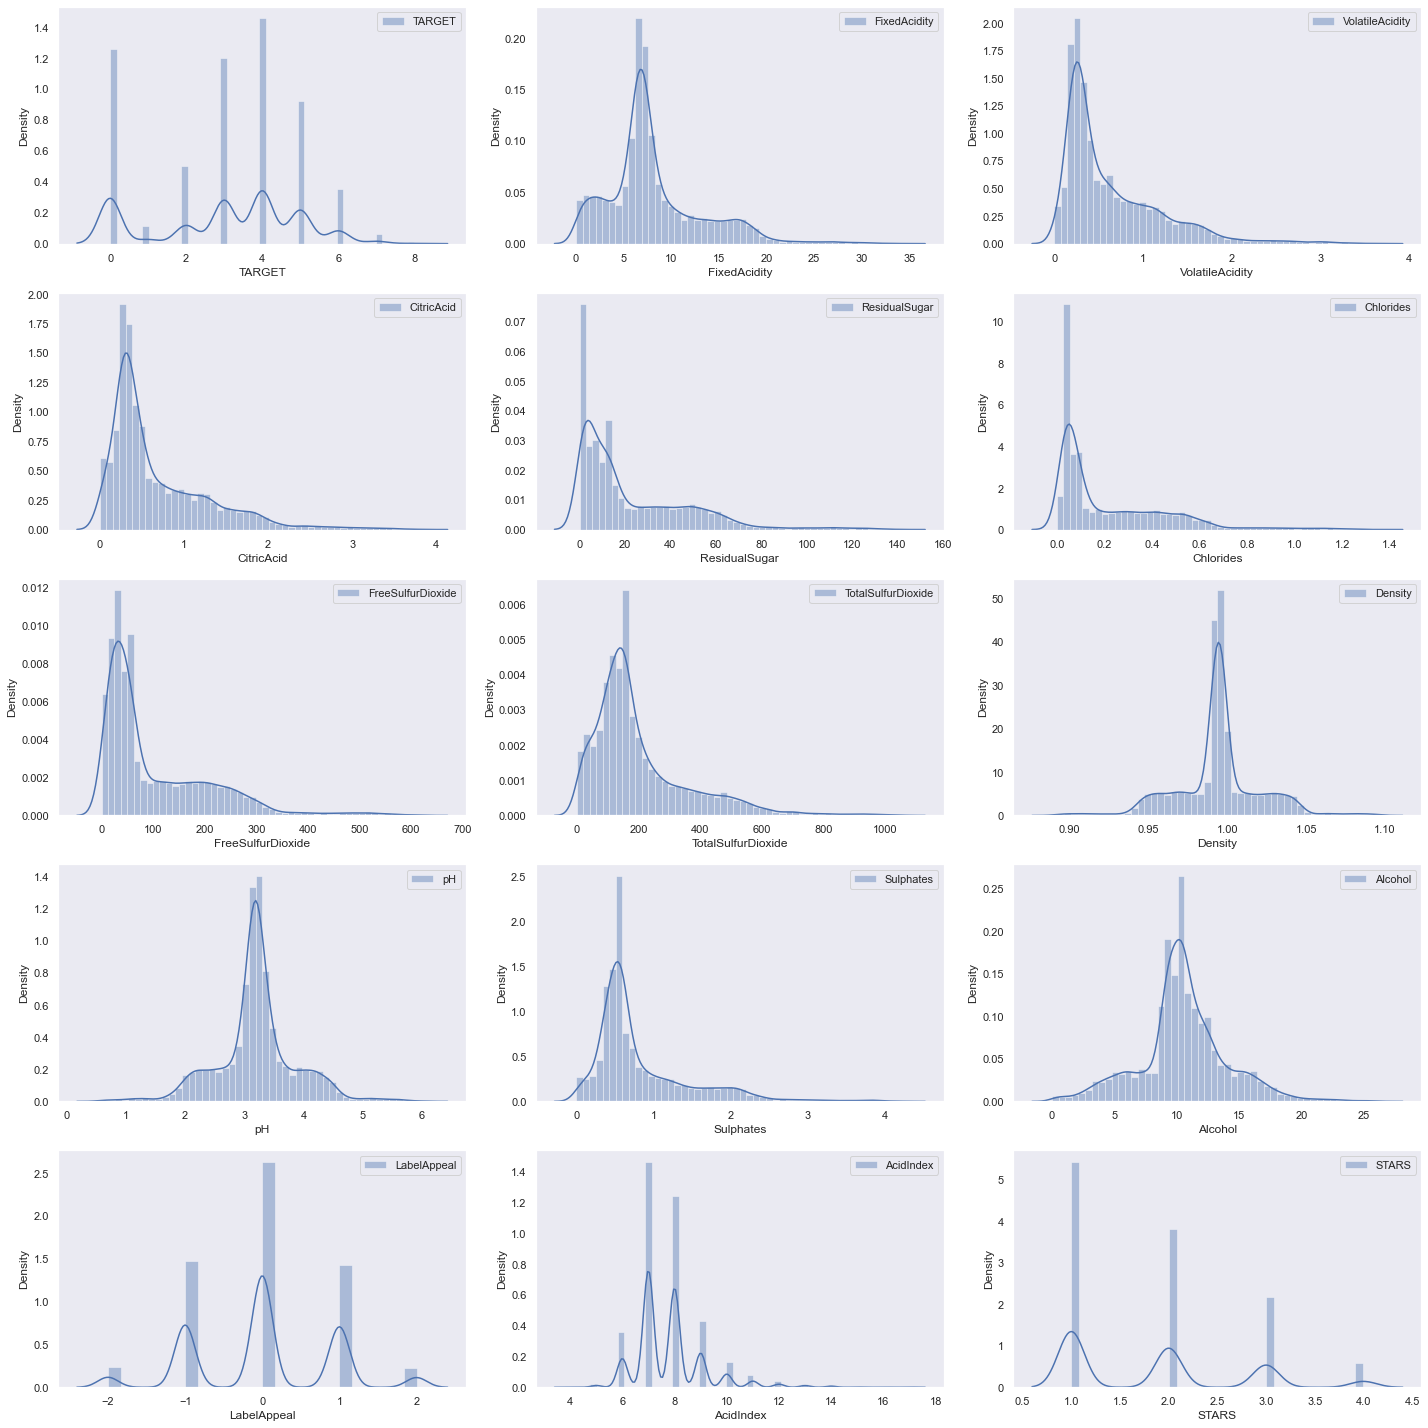

In [62]:
#This functions plots the estimated probability density function of the data
plt.figure(figsize=(20,20))
for i,col in enumerate(list(dfr1.columns.values)):
    plt.subplot(5,3,i+1)
    sns.distplot(dfr1[col],label=col,kde=True)
    plt.grid()
    plt.legend(loc= 'upper right')
    plt.tight_layout()

As we can notice the significant difference in the correlation value of 'STARS' attribute, let's do EDA for it

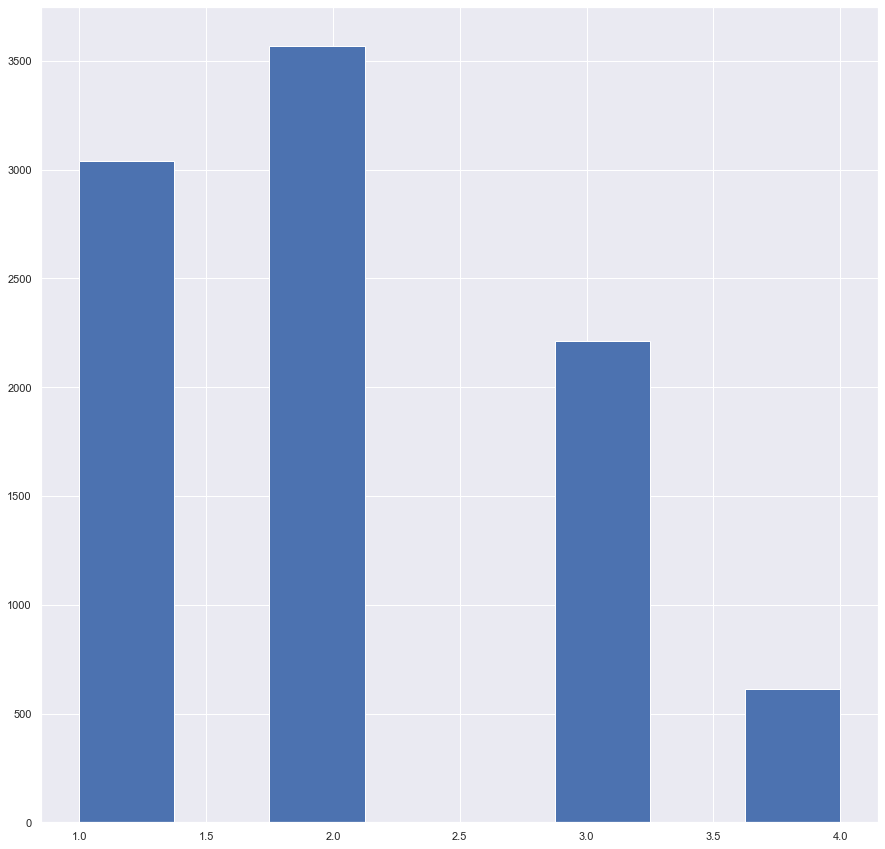

In [63]:
#histogram for STARS using raw data
df['STARS'].hist(bins = 8);

Notice the histogram for STARS before(above plot) and after(below plot cleaning and preparing the data. One can notice the increased numbers. Also see the changed median value in the boxplot

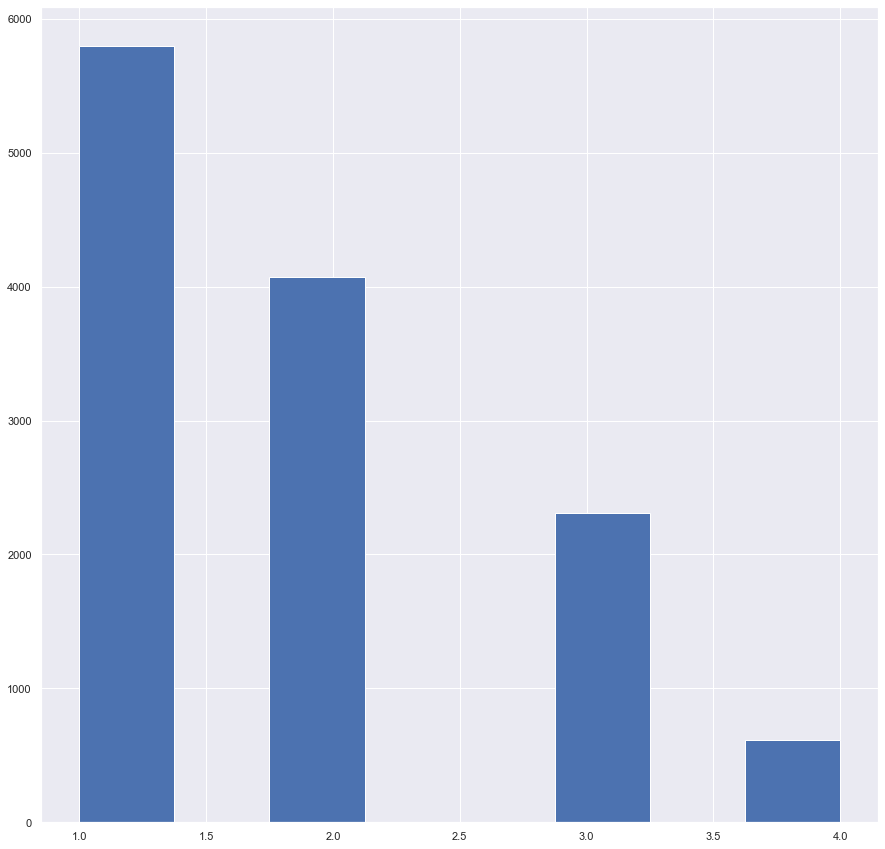

In [64]:
#histogram for STARS after cleaning and preparing the data
dfr1['STARS'].hist(bins = 8);

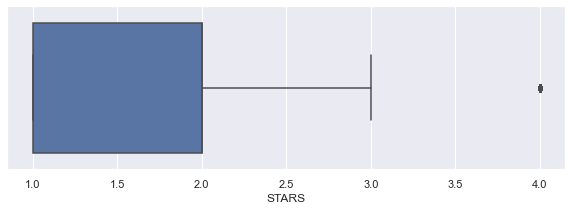

In [65]:
#plot boxplot to see the change of median value
sns.set(rc={'figure.figsize':(10,3)})
sns.boxplot(dfr1['STARS']);

<AxesSubplot:xlabel='TARGET', ylabel='STARS'>

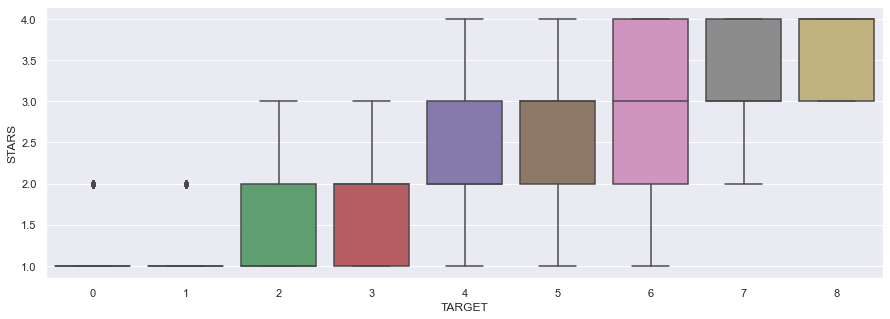

In [66]:
sns.set(rc={'figure.figsize':(15,5)})
sns.boxplot(x = dfr1['TARGET'],y = dfr1['STARS'],data = dfr1)

### CONCLUSION:
- __The only attribute 'STARS' with 26% of missing data, showed increase of correlation value from 0.56 to 0.67. One can definitely say that sales of the wine will increase with the ratings__
- __The other attributes with missing values did not make any difference and the correlation values did not change significantly. It is unnoticable__
- __Suggestion: 'STARS' attribute can be used the response variable instead of 'SALES/TARGET' attribute__